In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

2024-05-27 15:35:00.017613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 15:35:00.017645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 15:35:00.030484: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-27 15:35:00.062307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 15:35:01.113128: W tensorflow/compiler/tf2

In [2]:
def generate_time_series(batch_size, n_steps):
    random = np.random.RandomState(seed=43)
    freq1, freq2, offset1, offset2 = random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time- offset1) * (freq1 * 10+10))
    series += 0.2 * np.sin((time- offset2) * (freq1 * 20+20))
    series += 0.1 * (random.rand(batch_size, n_steps)- 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [41]:
n_steps = 50
series = generate_time_series(10000, 50)

In [42]:
xtrain, ytrain = series[:7000, :n_steps], series[:7000, -1]

In [43]:
xvalid, yvalid = series[7000:9000, :n_steps], series[7000:9000, -1]

In [44]:
xtest , ytest = series[9000:, :n_steps], series[:9000, -1]

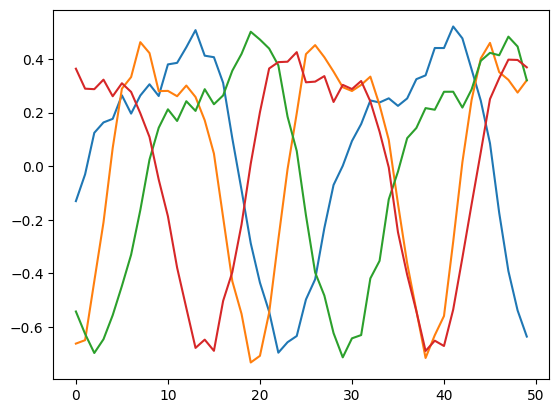

In [45]:
plt.plot(series[0,:])
plt.plot(series[1,:])
plt.plot(series[2,:])
plt.plot(series[3,:])
plt.show()

In [92]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10),
])

In [104]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.mse
)
model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
219/219 [==============================] - 5s 17ms/step - loss: 0.0020
Epoch 2/10
219/219 [==============================] - 3s 11ms/step - loss: 4.9931e-04
Epoch 3/10
219/219 [==============================] - 3s 12ms/step - loss: 1.8737e-04
Epoch 4/10
219/219 [==============================] - 2s 11ms/step - loss: 1.1109e-04
Epoch 5/10
219/219 [==============================] - 5s 21ms/step - loss: 7.5740e-05
Epoch 6/10
219/219 [==============================] - 5s 23ms/step - loss: 6.0395e-05
Epoch 7/10
219/219 [==============================] - 5s 23ms/step - loss: 5.2967e-05
Epoch 8/10
219/219 [==============================] - 5s 22ms/step - loss: 3.8815e-05
Epoch 9/10
219/219 [==============================] - 5s 21ms/step - loss: 3.7691e-05
Epoch 10/10
219/219 [==============================] - 5s 22ms/step - loss: 4.1067e-05


In [105]:
pred = model.predict(xtrain)

219/219 [==============================] - 2s 8ms/step


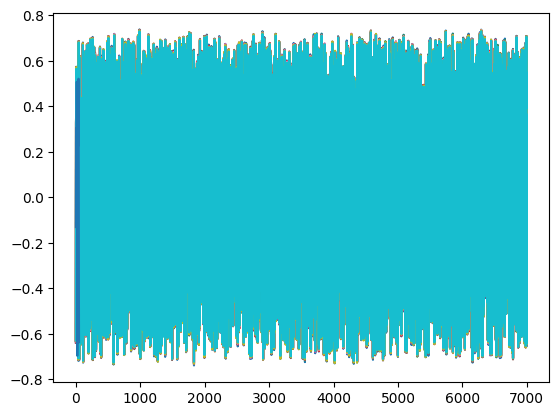

In [109]:
plt.plot(pred)
plt.plot(xtrain)

In [52]:
series = generate_time_series(1, n_steps+10)
x_new, y_new = series[:, :n_steps], series[:,n_steps:]
X = x_new
X.shape

(1, 50, 1)

In [59]:
for steps in range(10):
    y_pred_one = model.predict(X[:, steps:])
    y_pred_one = y_pred_one[:, :, np.newaxis]
    X = np.concatenate([X, y_pred_one], axis=1)
y_pred = X


1/1 [==============================] - 0s 24ms/step


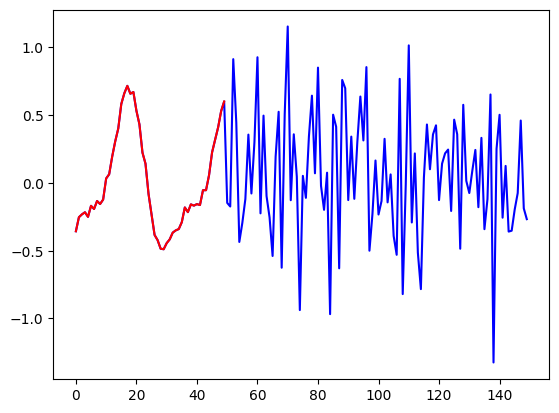

In [89]:
plt.plot(y_pred[0,],color='blue')
plt.plot(x_new[0,:], color='red')

plt.show()